# CS 2302 - Lab 1 - Recursion

## Overview

In this lab, you will solve 3 different recursion problems. The first one attempts to show a practical use of recursion. The idea is that you see how recursive algorithms are used to process data coming from a real source (in this case, Reddit). The last two problems are similar to the ones that tech companies use during coding interviews. Even though these last problems lack the *realness* aspect observed in the first problem, they will allow you to improve your recursion skills and help you get ready to crack potential coding interview questions for future internship or job opportunities. 


Remember:
* **Make your own copy of the notebook before working on it!**

    File > Save a Copy in Drive



### Grading
As stated in the syllabus, your lab consists of two parts: the source code  and the report. This colab counts as your source code submission only. However, for your report submission, you  are more than welcome to extend your colab to include what is required for the report. Alternatively, you can use any other text editor to write your lab report (Google Docs, Word, etc.). I personally recommend to stick to Google Colab as you can write code to draw the required plots, which makes the whole process simpler. Plus, you will learn how to use Markdown!

Each subsection in this colab is marked with point values, totaling 100 points.


## Problem 1 - Reddit

Context: Sophia really likes watching movies, so she decides to start a YouTube channel where she plans to review all sorts of films. To better understand what people think about a film, she decides to analyze what people post on [Reddit](https://en.wikipedia.org/wiki/Reddit). More concretely, she decides to read movie comments from the [/r/movies](https://www.reddit.com/r/movies/) subreddit to better understand what people think about a given film. After browsing the subreddit for a while, she realizes that people have all sorts of conversations about a movie (some positive and some negative). After seeing this, she thinks that it would be a good idea to talk about this in her review videos. She wants to 1) identify all the conversations that people are having about a specific movie, and 2) classify each of those conversations as either positive or negative. 

Sophia knows you are a great problem-solver, so she asks you to write a program that, given the URL to a specific Reddit thread, reads the different discussions people are having and classifies each of them as either positive or negative. To make things easier, you decide to make the assumption that each  top level comment is the start of a discussion. That is, the thread is assumed to have as many discussions as there are top level comments. For example, let's say that you have the following thread:


> $\color{blue}{\text{Top Level Comment 1 }}$

>> $\color{blue}{\text{Reply 1.1}}$

>>> $\color{blue}{\text{Reply 1.1.1}}$ 

>>>> $\color{blue}{\text{Reply 1.1.1.1 }}$

>>> $\color{blue}{\text{Reply 1.1.2}}$

>>> $\color{blue}{\text{Reply 1.1.3}}$

>> $\color{blue}{\text{Reply 1.2}}$

>> $\color{blue}{\text{Reply 1.3}}$

> $\color{orange}{\text{Top Level Comment 2}}$ 

>> $\color{orange}{\text{Reply 2.1}}$ 

>> $\color{orange}{\text{Reply 2.2}}$ 

>> $\color{orange}{\text{Reply 2.3}}$ 

>>> $\color{orange}{\text{Reply 2.3.1}}$ 

>>> $\color{orange}{\text{Reply 2.3.2}}$ 

> $\color{brown}{\text{Top Level Comment 3}}$ 

>> $\color{brown}{\text{Reply 3.1}}$ 

>> $\color{brown}{\text{Reply 3.2}}$ 

>>> $\color{brown}{\text{Reply 3.2.1}}$ 

>>> $\color{brown}{\text{Reply 3.2.2}}$ 

>>>> $\color{brown}{\text{Reply 3.2.2.1}}$ 

>>>> $\color{brown}{\text{Reply 3.2.2.2}}$ 

>>>> $\color{brown}{\text{Reply 3.2.2.3}}$ 

In this particular example, there are 3 top level comments, meaning that we are dealing with 3 different discussions. For illustration purposes, each discussion is represented with a different color. To determine how positive a given discussion is, you can classify all replies in the discussion as either positive or negative, and use the positive to negative ratio as a measure of positiveness. 

For example, let's say you're trying to determine whether dicussion 1 should be classified as positive or negative. The first step would be to classify every comment in the discussion independently. Let's assume that this process yields the following results:

Positive Comments: Top Comment 1, Reply 1.1, Reply 1.1.2, Reply 1.1.3, and Reply 1.3

Negative Comments: Reply 1.1.1, Reply 1.1.1,1, and Reply 1.2

Because there are more positive comments than negative ones, discussion 1 should be classified as positive. 

### Problem Decomposition

In order to help Sophia, we need to decompose the problem into smaller problems. Often, when we decompose a problem, the subproblems come as questions or tasks that need to be dealt with. If these questions/tasks are too abstract or complex, they need to broken down even further into smaller sub-tasks. Here's a list of questions you might be asking yourself right now:

1. Given the URL to a Reddit thread, how can I read its top level comments? Does Reddit have an [API](https://en.wikipedia.org/wiki/Application_programming_interface)? If so, how does it work?
2. Top level comments in a given thread have replies, and those replies have replies, and those have replies as well! The number of levels is unknown. How can my code traverse this recursive structure? 
3. Given a Reddit comment/reply, how can I classify it as either positive or negative? This sounds complex! Is there a library that can do this for me? If so, how can I integrate it into my project?
4. What useful information can I collect as the data is processed? What would help Sophia create great content for YouTube?
 
Let's solve some of these sub-problems together.


### Reddit API

Reddit provides developers with an API that you can leverage to do multiple things within the platform. Feel free to go over the [API documentation](https://www.reddit.com/dev/api/:// ) if you want to know exactly what functionality Reddit exposes through its API (spoiler alert! Among many other things, the API allows you to retrive the top level comments of a given thread). Because we are using Python, we will be using the [Python Reddit API Wrapper (PRAW)](https://praw.readthedocs.io/en/latest/). To be able to use PRAW, we first need to perform the following steps:

1. Go to this link: https://www.reddit.com/prefs/apps/
2. Scroll down and click on “Create another app”
3. Pick a name for your app, and fill out the rest of the form as follows
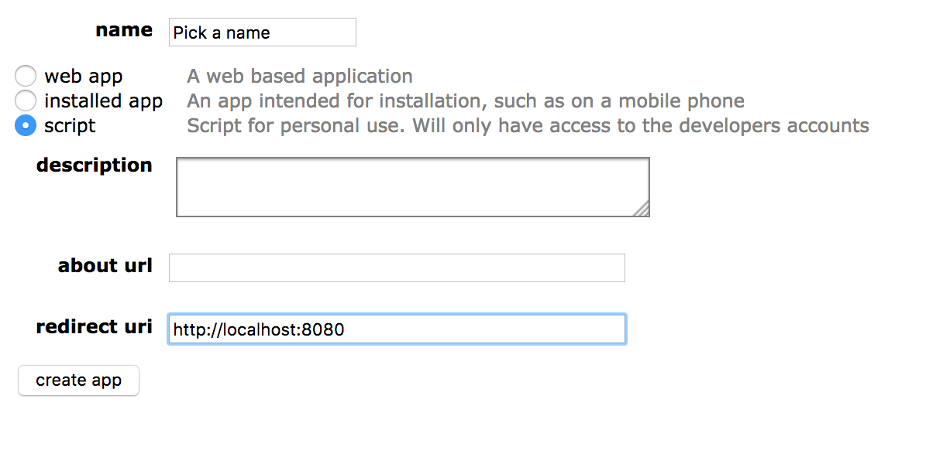


4. Click on ‘create app’ and you’ll see something like this (the important pieces of information here are your client id and your secret):
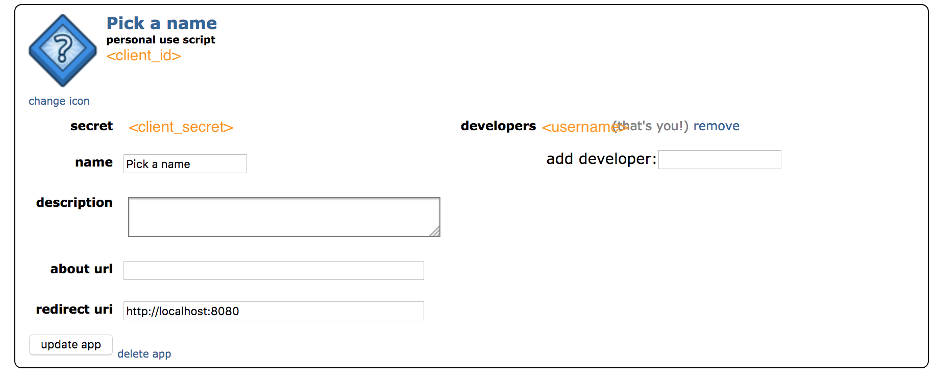

Copy and paste your client id and secret in the code cell below and run it. 

In [ ]:
!pip install praw # Install PRAW in our colab virtual machine

import praw


print("Creating instance of the Reddit class to talk to Reddit...")
reddit = praw.Reddit(client_id="PASTE YOUR CLIENT_ID HERE!!!!!!!",
                     client_secret="PASTE YOUR CLIENT_SECRET HERE!!!!!!!",
                     user_agent="cs2302_bot")

print("Reading 20 submissions from /r/learnpython...")
# Test communication with Reddit
for submission in reddit.subreddit("learnpython").hot(limit=20):  
    print(submission.title)

# To learn more about the Reddit class, visit the documentation page here https://praw.readthedocs.io/en/latest/code_overview/reddit_instance.html

     |████████████████████████████████| 153kB 2.7MB/s 
     |████████████████████████████████| 204kB 12.0MB/s 
Creating instance of the Reddit class to talk to Reddit...
Reading 20 submissions from /r/learnpython...


ResponseException: ignored

Great! Now we know we can programatically access Reddit. We solved a small sub-problem!  Let's figure out how to read the top level comments of a thread given its URL. If you look at [PRAW's Quick Start guide ](https://praw.readthedocs.io/en/latest/getting_started/quick_start.html), you'll see that they have an example that does exactly this. Run the following code cell to read the top level comments of a given thread.

In [ ]:
submission = reddit.submission(url='https://www.reddit.com/r/movies/comments/hkkmbh/35th_anniversary_of_back_to_the_future_like_with/')

top_level_comments = list(submission.comments)

print("Number of top level comments:", len(top_level_comments))

print("First five top comments:")

for i in range(5):
  print(i, ":", top_level_comments[i].body)





We're getting closer! We solved yet another sub-problem. Now let's figure out how to retreive the replies of a given top level comment or any other reply in the thread. Once again, an example is provided in [PRAW's Documentation](https://praw.readthedocs.io/en/latest/tutorials/comments.html)

In [ ]:
# Get and print the first 3 replies to the first top level comment

first_top_level_comment = top_level_comments[0]
second_level_comments = first_top_level_comment.replies

print("Second Level Comments:")
for i in range(3):
  print("Reply", i, ":", second_level_comments[i].body)

# Do you see the recursive structure? Every comment object 
# has a replies attribute

Great! Now we know how to get the replies to any given comment in a Reddit thread. Cool! 

### Sentiment Analysis

The next sub-problem we will tackle together is that of classifying a given piece of text as positive or negative. A quick Google search on this topic leads us to multiple libraries that do exactly this. Let's use the [Natural Language Toolkit (NLTK)](http://www.nltk.org/) from the University of Pennsylvania. If you visit their website, you'll see that they have a [guide on how to use their sentiment analysis](https://www.nltk.org/howto/sentiment.html) tool. Let's try it out.

In [ ]:
!pip install nltk  

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_text1 = "I love Back to the Future!"

sentiment_scores = sid.polarity_scores(sample_text1)

negative_score = sentiment_scores["neg"]
neutral_score = sentiment_scores["neu"]
positive_score = sentiment_scores["pos"]

print("negative_score:", negative_score)
print("neutral_score:", neutral_score)
print("positive_score:", positive_score)



Awesome! Now we know how to use NLTK to get some sentiment scores for a given piece of text! 

### [40 points] Solving the big problem

Use what you have learned to solve the main problem. Remember that Sophia's idea is to classify each discussion in a given thread (URL) as either positive or negative. Feel free to use the sentiment scores however you want to use them to perform this classification task (justify your decisions in the commments). Your solution MUST include a recursive algorithm that helps your traverse the comments in a given Reddit thread. 

Your code should output the number of dicussions in the thread along with their classifications (positive/negative). Feel free to also output other information you think would benefit Sophia create better content! 


In [ ]:
# Your code goes here

## Problem 2 

### [30 points] Can Divide 

Given an integer array *nums*, determine if it is possible to divide *nums* in two groups, so that the sums of the two groups are equal. Any of the two groups can be empty. Feel free to write a helper (recursive) method.

    Examples:
    nums = [4, 4] → true
    nums = [5, 2] → false
    nums = [2, 5, 3] → true
    nums = [-2, 2] → true
    nums = [] → true
    nums = [10, 5, 8] → false
    nums = [-5, -2, 7] → true
    nums = [2, 7, 3, 1, -1] → true



In [ ]:
# You are allowed to modify the code in the cell as you please, 
# just don't change the method signature.

# Feel free to write a helper (recursive) method. That is, it's OK if can_divide
# is not a recursive method as long as it calls another method that IS recursive

def can_divide(nums):

  return False 



Test your implementation by calling it multiple times with different input values and comparing the output produced by your method and the expected output. For each test, add a short comment explaining why you think that test is appropiate. Do not write an excesive amount of tests; just write the number of tests you think you need and justify your decisions. 

In [ ]:
# Your test cases go here



## Problem 3

### [30 points] Count Expressions

Given an integer array nums, and an integer target, write a function that determines how many expressions are possible which evaluate to target adding binary operators (not unary) +, -, and * between the digits in nums. Feel free to write a helper (recursive) method.

    Examples:
    nums = [1, 2, 3] and target = 6 → 2 (expressions: 1 + 2 + 3, 1 * 2 * 3)
    nums = [1, 2, 5] and target = 7 → 1 (expression: 1 * 2 + 5)
    nums = [0, 0] and target = 0 → 3 (expressions: 0 - 0, 0 + 0, 0 * 0)


In [ ]:
# You are allowed to modify the code in the cell as you please, 
# just don't change the method signature.

# Feel free to write a helper (recursive) method. That is, it's OK if count_expressions
# is not a recursive method as long as it calls another method that IS recursive

def count_expressions(nums, target):

  return 0 



Test your implementation by calling it multiple times with different input values and comparing the output produced by your method and the expected output. For each test, add a short comment explaining why you think that test is appropiate. Do not write an excesive amount of tests; just write the number of tests you think you need and justify your decisions. 

In [ ]:
# Your test cases go here

## How to Submit This Lab

1. File > Download .ipynb
2. Go to Blackboard, find the lab submission page, and upload the .ipynb file you just downloaded.

## Grading Rubric

|     Criteria    	|     Proficient    	|     Satisfactory    	|     Unsatisfactory    	|
|-	|-	|-	|-	|
|     Correctness    	|     The code compiles, runs, and solves the problem.                	|     The code compiles, runs, but does not solve the problem (partial implementation).    	|     The code does not compile/run, or little progress was made.          	|
|     Space and Time </br> complexities    	|     Appropriate for the problem.    	|     Can be greatly improved.    	|     Space and time complexity not analyzed     	|
|     Problem Decomposition    	|     Operations are broken down into loosely coupled, highly cohesive   methods    	|     Operations are broken down into methods, but they are not loosely   coupled/highly cohesive    	|     Most of the logic is inside a couple of big methods          	|
|     Style    	|     Variables and methods have meaningful/appropriate names     	|     Only a subset of the variables and methods have   meaningful/appropriate names     	|     Few or none of the variables and methods have meaningful/appropriate   names     	|
|     Robustness    	|     Program handles erroneous or unexpected input gracefully    	|     Program handles some erroneous or unexpected input gracefully    	|     Program does not handle erroneous or unexpected input gracefully    	|
|     Documentation    	|     Non-obvious code segments are well documented    	|     Some non-obvious code segments are documented    	|     Few or none non-obvious segments are documented    	|
|     Report     	|     Covers all required material in a concise and clear way with proper   grammar and spelling.    	|     Covers a subset of the required material in a concise and clear way   with proper grammar and spelling.    	|     Does not cover enough material and/or the material is not presented   in a concise and clear way with proper grammar and spelling.    	|